**Import libraries**

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Download data**

In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2022-11-22 19:30:38--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.5’

insurance.csv.5     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2022-11-22 19:30:38 (3.97 MB/s) - ‘insurance.csv.5’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


**ETL**

In [ ]:
df_object_col = dataset.select_dtypes(include=object)
df_num_col = dataset.select_dtypes(exclude=object)

In [ ]:
df = pd.get_dummies(df_object_col.region)
df['sex'] = df_object_col.sex.apply(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df_object_col.smoker.apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df=pd.concat([df, df_num_col], axis=1)

**Train-Test Split**

In [ ]:
df_train = df.sample(frac=0.8, random_state=52)
df_test = df.drop(df_train.index)

train_dataset = df_train.drop('expenses', axis=1)
train_labels = df_train.pop('expenses')
test_dataset = df_test.drop('expenses', axis=1)
test_labels = df_test.pop('expenses')

**Model creation**

In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [ ]:
model = keras.Sequential([
    normalizer,
    layers.Dense(9),
    layers.Dense(6),
    layers.Dense(3),
    layers.Dense(1)
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
              loss='mae', 
              metrics=['mae', 'mse'])

In [ ]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 9)                 90        
                                                                 
 dense_1 (Dense)             (None, 6)                 60        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 194
Trainable params: 175
Non-trainable params: 19
_________________________________________________________

In [ ]:
history = model.fit(x=train_dataset, 
                    y=train_labels, 
                    epochs=50, 
                    validation_split=0.2, 
                    verbose=0)

In [ ]:
history_df = pd.DataFrame(history.history)

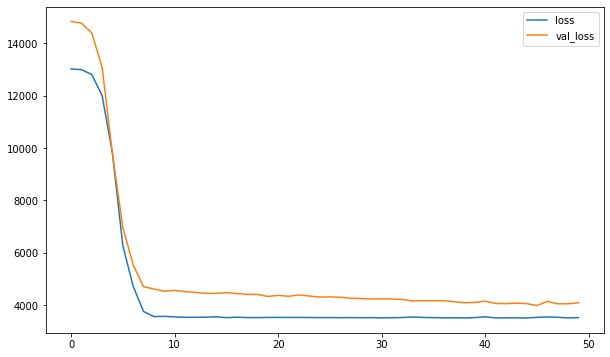

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_df[['loss','val_loss']]);
plt.legend(['loss','val_loss']);

In [ ]:
model.evaluate(test_dataset, test_labels, verbose=2)

9/9 - 0s - loss: 3175.6130 - mae: 3175.6130 - mse: 32852464.0000 - 66ms/epoch - 7ms/step


[3175.613037109375, 3175.613037109375, 32852464.0]

**Test**

9/9 - 0s - loss: 3175.6130 - mae: 3175.6130 - mse: 32852464.0000 - 54ms/epoch - 6ms/step
Testing set Mean Abs Error: 3175.61 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


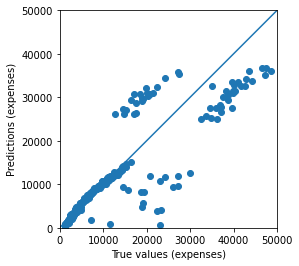

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
